In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import price sheet
adj_price = pd.read_csv(r'C:\Users\aya18\Desktop\5206HW3\adjusted.csv', parse_dates = ['Date'])

In [3]:
adj_price = pd.melt(adj_price, id_vars = 'Date', var_name = 'Stock', value_name = 'adj_price')
adj_price.head()

,Date,Stock,adj_price
0,2003-01-02,0111145D,23.1748
1,2003-01-03,0111145D,23.2212
2,2003-01-06,0111145D,23.4994
3,2003-01-07,0111145D,22.9894
4,2003-01-08,0111145D,23.0093


In [4]:
# import universe sheet
univ = pd.read_csv(r'C:\Users\aya18\Desktop\5206HW3\univ_h.csv')
univ = univ.melt(id_vars = "year", var_name = 'Stock', value_name = 'in_univ')
univ

,year,Stock,in_univ
0,2003,0111145D,1
1,2004,0111145D,1
2,2005,0111145D,1
3,2006,0111145D,1
4,2007,0111145D,1
...,...,...,...
19756,2019,ZTS,1
19757,2020,ZTS,1
19758,2021,ZTS,1
19759,2022,ZTS,1


In [5]:
# extract year
adj_price['year'] = adj_price['Date'].apply(lambda x: x.year)

In [6]:
# concatenate univ_h, then get the annual universe list
key_db = adj_price.merge(univ, on = ['year', 'Stock'])
key_db = key_db[key_db['in_univ'] == 1] # extract the needed ones
key_db.drop(['year', 'in_univ'], axis = 1, inplace = True)

In [7]:
key_db

,Date,Stock,adj_price
0,2003-01-02,0202445Q,34.74
1,2003-01-03,0202445Q,35.09
2,2003-01-06,0202445Q,35.90
3,2003-01-07,0202445Q,35.50
4,2003-01-08,0202445Q,34.79
...,...,...,...
4849455,2023-06-26,ZTS,167.54
4849456,2023-06-27,ZTS,170.67
4849457,2023-06-28,ZTS,169.10
4849458,2023-06-29,ZTS,171.87


### Computation of alpha factor V

In [8]:
import copy
import numpy as np

In [9]:
# build a new progression database
V_db = copy.deepcopy(key_db)
# compute log return
V_db['ln_ret'] = np.log(V_db['adj_price'] / V_db['adj_price'].shift(1))
# compute sigma of 21 days
V_db['sigma'] = V_db['ln_ret'].rolling(window = 21).std()
# computing 10-days return
V_db['10d_ret'] = V_db['ln_ret'].rolling(window = 10).sum()
# compute standardized v
V_db['std_vi'] = V_db['10d_ret']/V_db['sigma']

In [10]:
V_db

,Date,Stock,adj_price,ln_ret,sigma,10d_ret,std_vi
0,2003-01-02,0202445Q,34.74,NaN,NaN,NaN,NaN
1,2003-01-03,0202445Q,35.09,0.010024,NaN,NaN,NaN
2,2003-01-06,0202445Q,35.90,0.022821,NaN,NaN,NaN
3,2003-01-07,0202445Q,35.50,-0.011205,NaN,NaN,NaN
4,2003-01-08,0202445Q,34.79,-0.020203,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4849455,2023-06-26,ZTS,167.54,-0.004942,0.017591,0.026920,1.530352
4849456,2023-06-27,ZTS,170.67,0.018510,0.017236,0.030459,1.767152
4849457,2023-06-28,ZTS,169.10,-0.009242,0.017371,0.018442,1.061662
4849458,2023-06-29,ZTS,171.87,0.016248,0.016705,0.036861,2.206550


In [11]:
dates = np.sort(V_db['Date'].unique())
concat_list = []
for date in dates:
    session = V_db[V_db['Date'] == date]
    session['mkt_rmv_std_v'] = session['std_vi'] - session['std_vi'].mean()
    concat_list.append(session)
V_db = pd.concat(concat_list)

In [12]:
V_db

,Date,Stock,adj_price,ln_ret,sigma,10d_ret,std_vi,mkt_rmv_std_v
0,2003-01-02,0202445Q,34.7400,NaN,NaN,NaN,NaN,NaN
5159,2003-01-02,0203524D,6.9826,NaN,NaN,NaN,NaN,NaN
10318,2003-01-02,0226226D,22.9242,NaN,NaN,NaN,NaN,NaN
15477,2003-01-02,0544749D,19.7525,NaN,NaN,NaN,NaN,NaN
25795,2003-01-02,0772031D,4.2354,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4828823,2023-06-30,YUM,138.5500,0.009354,0.011221,-0.004680,-0.417135,-1.198028
4833982,2023-06-30,ZBH,145.6000,0.003095,0.011013,0.022621,2.054054,1.273161
4839141,2023-06-30,ZBRA,295.8300,0.024466,0.020832,0.038876,1.866136,1.085244
4844300,2023-06-30,ZION,26.8600,-0.015516,0.029074,-0.075968,-2.612876,-3.393768


In [13]:
key_db = key_db.merge(V_db[['Date', 'Stock', 'ln_ret', 'mkt_rmv_std_v']], on = ['Date', 'Stock'])
key_db

,Date,Stock,adj_price,ln_ret,mkt_rmv_std_v
0,2003-01-02,0202445Q,34.74,NaN,NaN
1,2003-01-03,0202445Q,35.09,0.010024,NaN
2,2003-01-06,0202445Q,35.90,0.022821,NaN
3,2003-01-07,0202445Q,35.50,-0.011205,NaN
4,2003-01-08,0202445Q,34.79,-0.020203,NaN
...,...,...,...,...,...
2585655,2023-06-26,ZTS,167.54,-0.004942,0.879598
2585656,2023-06-27,ZTS,170.67,0.018510,0.750480
2585657,2023-06-28,ZTS,169.10,-0.009242,0.792873
2585658,2023-06-29,ZTS,171.87,0.016248,1.285422


### Computation of M

In [14]:
M_db = copy.deepcopy(key_db[['Date', 'Stock', 'ln_ret']])
M_db

,Date,Stock,ln_ret
0,2003-01-02,0202445Q,NaN
1,2003-01-03,0202445Q,0.010024
2,2003-01-06,0202445Q,0.022821
3,2003-01-07,0202445Q,-0.011205
4,2003-01-08,0202445Q,-0.020203
...,...,...,...
2585655,2023-06-26,ZTS,-0.004942
2585656,2023-06-27,ZTS,0.018510
2585657,2023-06-28,ZTS,-0.009242
2585658,2023-06-29,ZTS,0.016248


In [15]:
# compute the ABSOLUTE mkt removed log return
dates = np.sort(M_db['Date'].unique())
concat_list = []
for date in dates:
    session = M_db[M_db['Date'] == date]
    session['abs_mkt_rmv_ln_ret'] = (session['ln_ret'] - session['ln_ret'].mean()).abs()
    concat_list.append(session)
M_db = pd.concat(concat_list)

In [16]:
# extract MAX value of the last 21 days
stocks = M_db['Stock'].unique()
concat_list = []
for stock in stocks:
    session = M_db[M_db['Stock'] == stock]
    session.sort_values(by = 'Date', ascending = True)
    session['MAX'] = session['abs_mkt_rmv_ln_ret'].rolling(window = 21).max()
    concat_list.append(session)
M_db = pd.concat(concat_list)

In [17]:
# remove mkt effect from MAX factor
dates = np.sort(M_db['Date'].unique())
concat_list = []
for date in dates:
    session = M_db[M_db['Date'] == date]
    session['mkt_rmv_MAX'] = session['MAX'] - session['MAX'].mean()
    concat_list.append(session)
M_db = pd.concat(concat_list)

In [18]:
M_db

,Date,Stock,ln_ret,abs_mkt_rmv_ln_ret,MAX,mkt_rmv_MAX
0,2003-01-02,0202445Q,NaN,NaN,NaN,NaN
2015,2003-01-02,0203524D,NaN,NaN,NaN,NaN
4282,2003-01-02,0226226D,NaN,NaN,NaN,NaN
6045,2003-01-02,0544749D,NaN,NaN,NaN,NaN
7806,2003-01-02,0772031D,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1834354,2023-06-30,ON,0.026788,0.018555,0.043300,0.006636
2195857,2023-06-30,STLD,-0.001926,0.010159,0.047865,0.011201
2313505,2023-06-30,TRGP,0.011764,0.003531,0.018856,-0.017808
2423094,2023-06-30,VICI,0.001592,0.006641,0.022516,-0.014148


In [19]:
key_db = key_db.merge(M_db[['Date', 'Stock', 'mkt_rmv_MAX']], on = ['Date', 'Stock'])
key_db

,Date,Stock,adj_price,ln_ret,mkt_rmv_std_v,mkt_rmv_MAX
0,2003-01-02,0202445Q,34.74,NaN,NaN,NaN
1,2003-01-03,0202445Q,35.09,0.010024,NaN,NaN
2,2003-01-06,0202445Q,35.90,0.022821,NaN,NaN
3,2003-01-07,0202445Q,35.50,-0.011205,NaN,NaN
4,2003-01-08,0202445Q,34.79,-0.020203,NaN,NaN
...,...,...,...,...,...,...
2585655,2023-06-26,ZTS,167.54,-0.004942,0.879598,0.008758
2585656,2023-06-27,ZTS,170.67,0.018510,0.750480,0.009949
2585657,2023-06-28,ZTS,169.10,-0.009242,0.792873,0.009634
2585658,2023-06-29,ZTS,171.87,0.016248,1.285422,0.009587


### Do Cross-sectional regression

In [20]:
import statsmodels.api as sm

In [21]:
regr_db = copy.deepcopy(key_db)

In [22]:
regr_db = regr_db[['Date', 'Stock', 'ln_ret', 'mkt_rmv_std_v', 'mkt_rmv_MAX']]

In [23]:
regr_db

,Date,Stock,ln_ret,mkt_rmv_std_v,mkt_rmv_MAX
0,2003-01-02,0202445Q,NaN,NaN,NaN
1,2003-01-03,0202445Q,0.010024,NaN,NaN
2,2003-01-06,0202445Q,0.022821,NaN,NaN
3,2003-01-07,0202445Q,-0.011205,NaN,NaN
4,2003-01-08,0202445Q,-0.020203,NaN,NaN
...,...,...,...,...,...
2585655,2023-06-26,ZTS,-0.004942,0.879598,0.008758
2585656,2023-06-27,ZTS,0.018510,0.750480,0.009949
2585657,2023-06-28,ZTS,-0.009242,0.792873,0.009634
2585658,2023-06-29,ZTS,0.016248,1.285422,0.009587


In [24]:
# remove mkt effect from MAX factor
dates = np.sort(regr_db['Date'].unique())
concat_list = []
for date in dates:
    session = regr_db[regr_db['Date'] == date]
    session['mkt_rmv_ln_ret'] = session['ln_ret'] - session['ln_ret'].mean()
    concat_list.append(session)
regr_db = pd.concat(concat_list)

In [25]:
regr_db['next_day_mkt_rmv_ln_ret'] = regr_db['mkt_rmv_ln_ret'].shift(-1)
regr_db

,Date,Stock,ln_ret,mkt_rmv_std_v,mkt_rmv_MAX,mkt_rmv_ln_ret,next_day_mkt_rmv_ln_ret
0,2003-01-02,0202445Q,NaN,NaN,NaN,NaN,NaN
2015,2003-01-02,0203524D,NaN,NaN,NaN,NaN,NaN
4282,2003-01-02,0226226D,NaN,NaN,NaN,NaN,NaN
6045,2003-01-02,0544749D,NaN,NaN,NaN,NaN,NaN
7806,2003-01-02,0772031D,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2572071,2023-06-30,YUM,0.009354,-1.198028,-0.016801,0.001122,-0.005137
2577230,2023-06-30,ZBH,0.003095,1.273161,0.002857,-0.005137,0.016233
2578110,2023-06-30,ZBRA,0.024466,1.085244,-0.008256,0.016233,-0.023748
2583269,2023-06-30,ZION,-0.015516,-3.393768,0.020130,-0.023748,-0.006256


In [26]:
# repolace 'NA' with 0
regr_db = regr_db.fillna(0)

In [27]:
regr_db

,Date,Stock,ln_ret,mkt_rmv_std_v,mkt_rmv_MAX,mkt_rmv_ln_ret,next_day_mkt_rmv_ln_ret
0,2003-01-02,0202445Q,0.000000,0.000000,0.000000,0.000000,0.000000
2015,2003-01-02,0203524D,0.000000,0.000000,0.000000,0.000000,0.000000
4282,2003-01-02,0226226D,0.000000,0.000000,0.000000,0.000000,0.000000
6045,2003-01-02,0544749D,0.000000,0.000000,0.000000,0.000000,0.000000
7806,2003-01-02,0772031D,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2572071,2023-06-30,YUM,0.009354,-1.198028,-0.016801,0.001122,-0.005137
2577230,2023-06-30,ZBH,0.003095,1.273161,0.002857,-0.005137,0.016233
2578110,2023-06-30,ZBRA,0.024466,1.085244,-0.008256,0.016233,-0.023748
2583269,2023-06-30,ZION,-0.015516,-3.393768,0.020130,-0.023748,-0.006256


In [28]:
# try for cross-sectional regression
dates = np.sort(regr_db['Date'].unique())
concat_list = []
for date in dates:
    session = regr_db[regr_db['Date'] == date]
    # regress next-day return on factors
    y = session['next_day_mkt_rmv_ln_ret']
    x = session[['mkt_rmv_std_v', 'mkt_rmv_MAX']]
    model = sm.OLS(y, x).fit()
    betas = pd.DataFrame({"Date": [date], "beta_V": [model.params['mkt_rmv_std_v']], "beta_M": [model.params['mkt_rmv_MAX']]})
    concat_list.append(betas)
regr_betas = pd.concat(concat_list)

In [29]:
regr_betas

,Date,beta_V,beta_M
0,2003-01-02,-0.018343,0.000000
0,2003-01-03,-0.000005,0.000000
0,2003-01-06,-0.000045,0.000000
0,2003-01-07,0.000508,0.000000
0,2003-01-08,-0.000335,0.000000
...,...,...,...
0,2023-06-26,0.000324,-0.001327
0,2023-06-27,0.000175,-0.012051
0,2023-06-28,0.000495,-0.033751
0,2023-06-29,-0.000077,0.001437


### Computation of average Betas and T-stats

In [30]:
avg_t_raw = copy.deepcopy(regr_betas)

In [31]:
avg_t_raw['Year'] = avg_t_raw['Date'].apply(lambda x: x.year)
avg_t_raw

,Date,beta_V,beta_M,Year
0,2003-01-02,-0.018343,0.000000,2003
0,2003-01-03,-0.000005,0.000000,2003
0,2003-01-06,-0.000045,0.000000,2003
0,2003-01-07,0.000508,0.000000,2003
0,2003-01-08,-0.000335,0.000000,2003
...,...,...,...,...
0,2023-06-26,0.000324,-0.001327,2023
0,2023-06-27,0.000175,-0.012051,2023
0,2023-06-28,0.000495,-0.033751,2023
0,2023-06-29,-0.000077,0.001437,2023


In [32]:
years = list(range(2003, 2024))
years

[2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [33]:
trading_day_concat = []
for year in years:
    year_date_array = ((avg_t_raw[avg_t_raw['Year'] == year])['Date']).unique() # get the total trading days of the year
    trading_day_in_year = pd.DataFrame({"Year": [year], "trading_days": [len(year_date_array)]})
    trading_day_concat.append(trading_day_in_year)
trading_days_tb = pd.concat(trading_day_concat)

In [34]:
trading_days_tb

,Year,trading_days
0,2003,252
0,2004,252
0,2005,252
0,2006,251
0,2007,251
0,2008,253
0,2009,252
0,2010,252
0,2011,252
0,2012,250


In [35]:
avg_t_raw = avg_t_raw.merge(trading_days_tb, on = ['Year'])

In [36]:
avg_t_raw

,Date,beta_V,beta_M,Year,trading_days
0,2003-01-02,-0.018343,0.000000,2003,252
1,2003-01-03,-0.000005,0.000000,2003,252
2,2003-01-06,-0.000045,0.000000,2003,252
3,2003-01-07,0.000508,0.000000,2003,252
4,2003-01-08,-0.000335,0.000000,2003,252
...,...,...,...,...,...
5154,2023-06-26,0.000324,-0.001327,2023,124
5155,2023-06-27,0.000175,-0.012051,2023,124
5156,2023-06-28,0.000495,-0.033751,2023,124
5157,2023-06-29,-0.000077,0.001437,2023,124


In [37]:
# build new columns to hold computing output, computing by 'metrix method'
avg_t_raw['avg_of_beta_V'] = 0
avg_t_raw['avg_of_beta_M'] = 0
avg_t_raw['std_of_beta_V'] = 0
avg_t_raw['std_of_beta_M'] = 0

In [38]:
avg_t_raw

,Date,beta_V,beta_M,Year,trading_days,avg_of_beta_V,avg_of_beta_M,std_of_beta_V,std_of_beta_M
0,2003-01-02,-0.018343,0.000000,2003,252,0,0,0,0
1,2003-01-03,-0.000005,0.000000,2003,252,0,0,0,0
2,2003-01-06,-0.000045,0.000000,2003,252,0,0,0,0
3,2003-01-07,0.000508,0.000000,2003,252,0,0,0,0
4,2003-01-08,-0.000335,0.000000,2003,252,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5154,2023-06-26,0.000324,-0.001327,2023,124,0,0,0,0
5155,2023-06-27,0.000175,-0.012051,2023,124,0,0,0,0
5156,2023-06-28,0.000495,-0.033751,2023,124,0,0,0,0
5157,2023-06-29,-0.000077,0.001437,2023,124,0,0,0,0


In [39]:
for i in range(0, len(avg_t_raw)):
    avg_t_raw['avg_of_beta_V'][i] = ((avg_t_raw['beta_V']).rolling(window = avg_t_raw['trading_days'][i]).mean())[i]
    avg_t_raw['avg_of_beta_M'][i] = ((avg_t_raw['beta_M']).rolling(window = avg_t_raw['trading_days'][i]).mean())[i]
    avg_t_raw['std_of_beta_V'][i] = ((avg_t_raw['beta_V']).rolling(window = avg_t_raw['trading_days'][i]).std())[i]
    avg_t_raw['std_of_beta_M'][i] = ((avg_t_raw['beta_M']).rolling(window = avg_t_raw['trading_days'][i]).std())[i]

In [40]:
avg_t_raw

,Date,beta_V,beta_M,Year,trading_days,avg_of_beta_V,avg_of_beta_M,std_of_beta_V,std_of_beta_M
0,2003-01-02,-0.018343,0.000000,2003,252,NaN,NaN,NaN,NaN
1,2003-01-03,-0.000005,0.000000,2003,252,NaN,NaN,NaN,NaN
2,2003-01-06,-0.000045,0.000000,2003,252,NaN,NaN,NaN,NaN
3,2003-01-07,0.000508,0.000000,2003,252,NaN,NaN,NaN,NaN
4,2003-01-08,-0.000335,0.000000,2003,252,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5154,2023-06-26,0.000324,-0.001327,2023,124,0.000032,0.000901,0.000821,0.020826
5155,2023-06-27,0.000175,-0.012051,2023,124,0.000036,0.000663,0.000820,0.020804
5156,2023-06-28,0.000495,-0.033751,2023,124,0.000042,0.000355,0.000821,0.021029
5157,2023-06-29,-0.000077,0.001437,2023,124,0.000042,0.000412,0.000821,0.021022


In [43]:
# build new columns to hold t stats
avg_t_raw['T_stat_of_beta_V'] = 0
avg_t_raw['T_stat_of_beta_M'] = 0

In [44]:
for i in range(0, len(avg_t_raw)):
    avg_t_raw['T_stat_of_beta_V'][i] = (np.sqrt(avg_t_raw['trading_days'][i])*avg_t_raw['avg_of_beta_V'][i]) / avg_t_raw['std_of_beta_V'][i]
    avg_t_raw['T_stat_of_beta_M'][i] = (np.sqrt(avg_t_raw['trading_days'][i])*avg_t_raw['avg_of_beta_M'][i]) / avg_t_raw['std_of_beta_M'][i]

In [48]:
avg_t_raw

,Date,beta_V,beta_M,Year,trading_days,avg_of_beta_V,avg_of_beta_M,std_of_beta_V,std_of_beta_M,T_stat_of_beta_V,T_stat_of_beta_M
0,2003-01-02,-0.018343,0.000000,2003,252,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-01-03,-0.000005,0.000000,2003,252,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-01-06,-0.000045,0.000000,2003,252,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-01-07,0.000508,0.000000,2003,252,NaN,NaN,NaN,NaN,NaN,NaN
4,2003-01-08,-0.000335,0.000000,2003,252,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5154,2023-06-26,0.000324,-0.001327,2023,124,0.000032,0.000901,0.000821,0.020826,0.428085,0.481997
5155,2023-06-27,0.000175,-0.012051,2023,124,0.000036,0.000663,0.000820,0.020804,0.490655,0.355093
5156,2023-06-28,0.000495,-0.033751,2023,124,0.000042,0.000355,0.000821,0.021029,0.566390,0.187822
5157,2023-06-29,-0.000077,0.001437,2023,124,0.000042,0.000412,0.000821,0.021022,0.569360,0.218017


In [49]:
avg_t_db = avg_t_raw[['Date', 'avg_of_beta_V', 'avg_of_beta_M' ,'T_stat_of_beta_V', 'T_stat_of_beta_M']]

In [50]:
avg_t_db

,Date,avg_of_beta_V,avg_of_beta_M,T_stat_of_beta_V,T_stat_of_beta_M
0,2003-01-02,NaN,NaN,NaN,NaN
1,2003-01-03,NaN,NaN,NaN,NaN
2,2003-01-06,NaN,NaN,NaN,NaN
3,2003-01-07,NaN,NaN,NaN,NaN
4,2003-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...,...
5154,2023-06-26,0.000032,0.000901,0.428085,0.481997
5155,2023-06-27,0.000036,0.000663,0.490655,0.355093
5156,2023-06-28,0.000042,0.000355,0.566390,0.187822
5157,2023-06-29,0.000042,0.000412,0.569360,0.218017


### Time series Regression

In [51]:
key_db

,Date,Stock,adj_price,ln_ret,mkt_rmv_std_v,mkt_rmv_MAX
0,2003-01-02,0202445Q,34.74,NaN,NaN,NaN
1,2003-01-03,0202445Q,35.09,0.010024,NaN,NaN
2,2003-01-06,0202445Q,35.90,0.022821,NaN,NaN
3,2003-01-07,0202445Q,35.50,-0.011205,NaN,NaN
4,2003-01-08,0202445Q,34.79,-0.020203,NaN,NaN
...,...,...,...,...,...,...
2585655,2023-06-26,ZTS,167.54,-0.004942,0.879598,0.008758
2585656,2023-06-27,ZTS,170.67,0.018510,0.750480,0.009949
2585657,2023-06-28,ZTS,169.10,-0.009242,0.792873,0.009634
2585658,2023-06-29,ZTS,171.87,0.016248,1.285422,0.009587


In [52]:
ts_regr_db = copy.deepcopy(key_db[['Date', 'Stock', 'ln_ret', 'mkt_rmv_std_v', 'mkt_rmv_MAX']])
ts_regr_db = ts_regr_db.merge(avg_t_db[['Date', 'avg_of_beta_V', 'avg_of_beta_M']], on = ['Date'])
ts_regr_db

,Date,Stock,ln_ret,mkt_rmv_std_v,mkt_rmv_MAX,avg_of_beta_V,avg_of_beta_M
0,2003-01-02,0202445Q,NaN,NaN,NaN,NaN,NaN
1,2003-01-02,0203524D,NaN,NaN,NaN,NaN,NaN
2,2003-01-02,0226226D,NaN,NaN,NaN,NaN,NaN
3,2003-01-02,0544749D,NaN,NaN,NaN,NaN,NaN
4,2003-01-02,0772031D,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2585655,2023-06-30,YUM,0.009354,-1.198028,-0.016801,0.000039,0.000125
2585656,2023-06-30,ZBH,0.003095,1.273161,0.002857,0.000039,0.000125
2585657,2023-06-30,ZBRA,0.024466,1.085244,-0.008256,0.000039,0.000125
2585658,2023-06-30,ZION,-0.015516,-3.393768,0.020130,0.000039,0.000125


In [53]:
# compute expected return: ret_expected is computed at day t, but it actually represents the expectation of day t+1, and we select stocks of day t+1 by scores of day t
ts_regr_db['ret_expected'] = ts_regr_db['mkt_rmv_std_v']*ts_regr_db['mkt_rmv_MAX'] + ts_regr_db['avg_of_beta_V']*ts_regr_db['avg_of_beta_M']

In [54]:
ts_regr_db

,Date,Stock,ln_ret,mkt_rmv_std_v,mkt_rmv_MAX,avg_of_beta_V,avg_of_beta_M,ret_expected
0,2003-01-02,0202445Q,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-01-02,0203524D,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-01-02,0226226D,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-01-02,0544749D,NaN,NaN,NaN,NaN,NaN,NaN
4,2003-01-02,0772031D,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2585655,2023-06-30,YUM,0.009354,-1.198028,-0.016801,0.000039,0.000125,0.020128
2585656,2023-06-30,ZBH,0.003095,1.273161,0.002857,0.000039,0.000125,0.003637
2585657,2023-06-30,ZBRA,0.024466,1.085244,-0.008256,0.000039,0.000125,-0.008960
2585658,2023-06-30,ZION,-0.015516,-3.393768,0.020130,0.000039,0.000125,-0.068316


In [55]:
# shift ret_expected, to put it together with day t+1
stocks = ts_regr_db['Stock'].unique()
concat_list = []
for stock in stocks:
    session = ts_regr_db[ts_regr_db['Stock'] == stock]
    session.sort_values(by = 'Date', ascending = True, inplace = True)
    session['ret_expected'] = session['ret_expected'].shift(1)
    concat_list.append(session)
ts_regr_db = pd.concat(concat_list)

In [56]:
ts_regr_db

,Date,Stock,ln_ret,mkt_rmv_std_v,mkt_rmv_MAX,avg_of_beta_V,avg_of_beta_M,ret_expected
0,2003-01-02,0202445Q,NaN,NaN,NaN,NaN,NaN,NaN
498,2003-01-03,0202445Q,0.010024,NaN,NaN,NaN,NaN,NaN
996,2003-01-06,0202445Q,0.022821,NaN,NaN,NaN,NaN,NaN
1494,2003-01-07,0202445Q,-0.011205,NaN,NaN,NaN,NaN,NaN
1992,2003-01-08,0202445Q,-0.020203,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2583624,2023-06-26,WBD,-0.000849,-5.301212,0.033764,0.000032,0.000901,-0.173648
2584127,2023-06-27,WBD,0.040754,-4.869341,0.034955,0.000036,0.000663,-0.178992
2584630,2023-06-28,WBD,0.014563,-3.345452,0.034640,0.000042,0.000355,-0.170207
2585133,2023-06-29,WBD,-0.002413,-3.822517,0.034593,0.000042,0.000412,-0.115887


### Build everyday portfolio

In [57]:
# Build backtesting table
bt_db = copy.deepcopy(ts_regr_db[['Date', 'Stock', 'ln_ret', 'ret_expected']])
bt_db

,Date,Stock,ln_ret,ret_expected
0,2003-01-02,0202445Q,NaN,NaN
498,2003-01-03,0202445Q,0.010024,NaN
996,2003-01-06,0202445Q,0.022821,NaN
1494,2003-01-07,0202445Q,-0.011205,NaN
1992,2003-01-08,0202445Q,-0.020203,NaN
...,...,...,...,...
2583624,2023-06-26,WBD,-0.000849,-0.173648
2584127,2023-06-27,WBD,0.040754,-0.178992
2584630,2023-06-28,WBD,0.014563,-0.170207
2585133,2023-06-29,WBD,-0.002413,-0.115887


In [58]:
# cut the timeperiod to the needed section
bt_db = bt_db[bt_db['Date'] >= '2006-01-01']
bt_db

,Date,Stock,ln_ret,ret_expected
376488,2006-01-03,0202445Q,0.020088,0.011539
376986,2006-01-04,0202445Q,0.002372,-0.001675
377484,2006-01-05,0202445Q,0.010604,-0.007148
377982,2006-01-06,0202445Q,-0.021322,-0.011048
378480,2006-01-09,0202445Q,0.015150,0.003854
...,...,...,...,...
2583624,2023-06-26,WBD,-0.000849,-0.173648
2584127,2023-06-27,WBD,0.040754,-0.178992
2584630,2023-06-28,WBD,0.014563,-0.170207
2585133,2023-06-29,WBD,-0.002413,-0.115887


In [59]:
bt_db.iloc[-1]

Date            2023-06-30 00:00:00
Stock                           WBD
ln_ret                     0.009615
ret_expected              -0.132233
Name: 2585636, dtype: object

In [60]:
bt_db.iloc[-2:-1]

,Date,Stock,ln_ret,ret_expected
2585133,2023-06-29,WBD,-0.002413,-0.115887


In [61]:
bt_db.tail(int(len(bt_db)*0.2))

,Date,Stock,ln_ret,ret_expected
2036445,2019-03-06,WEC,0.003403,-0.053466
2036950,2019-03-07,WEC,0.004174,-0.073274
2037455,2019-03-08,WEC,0.002211,-0.066995
2037960,2019-03-11,WEC,0.001946,-0.046974
2038465,2019-03-12,WEC,0.005557,-0.085004
...,...,...,...,...
2583624,2023-06-26,WBD,-0.000849,-0.173648
2584127,2023-06-27,WBD,0.040754,-0.178992
2584630,2023-06-28,WBD,0.014563,-0.170207
2585133,2023-06-29,WBD,-0.002413,-0.115887


In [62]:
# build portfolio
dates = np.sort(bt_db['Date'].unique())
portfolio_list = []
port_ret_list = []
for date in dates:
    session = bt_db[bt_db['Date'] == date]
    # rank the stocks by the order of score, big to small, top ones are biggest ones
    session.sort_values(by = ['ret_expected'], ascending = False, inplace = True)
    # select out top 20% stocks
    top_20p = session.head(int(len(session)*0.2))
    Number_of_long = int(len(session)*0.2)
    # select out bottom 20% stocks
    bottom_20p = session.tail(int(len(session)*0.2))
    bottom_20p['ln_ret'] = - bottom_20p['ln_ret'] # short the stocks
    # build today's portfolio
    portfolio = pd.concat([top_20p, bottom_20p])
    port_ret_today = portfolio['ln_ret'].sum()/Number_of_long
    port_ret = pd.DataFrame({"Date": [date], "Return_of_Portfolio": [port_ret_today]})
    # output the result
    portfolio_list.append(portfolio)
    port_ret_list.append(port_ret)
portfolio_details = pd.concat(portfolio_list)
portfolio_return = pd.concat(port_ret_list)

In [63]:
portfolio_details

,Date,Stock,ln_ret,ret_expected
376754,2006-01-03,HUM,0.026345,0.504658
376681,2006-01-03,DRI,-0.010081,0.428497
376818,2006-01-03,MRK,0.029125,0.232461
376569,2006-01-03,ADBE,0.041341,0.227864
376639,2006-01-03,CCTYQ,0.008813,0.217115
...,...,...,...,...
2585625,2023-06-30,VMC,-0.002665,-0.166451
2585547,2023-06-30,REGN,-0.014184,-0.303059
2585635,2023-06-30,WBA,-0.004221,-0.355956
2585159,2023-06-30,AAP,-0.029892,-0.466226


In [64]:
portfolio_return # here, we suppose 2006-01-03 is the first day of our buying stocks.But actually, we compute the scores on the last one trading day before 2006-01-03.

,Date,Return_of_Portfolio
0,2006-01-03,0.143176
0,2006-01-04,0.004063
0,2006-01-05,-0.001810
0,2006-01-06,0.000730
0,2006-01-09,0.000646
...,...,...
0,2023-06-26,0.006353
0,2023-06-27,0.001105
0,2023-06-28,0.015323
0,2023-06-29,0.002307


In [65]:
portfolio_return['Year'] = portfolio_return['Date'].apply(lambda x: x.year)

In [66]:
portfolio_return

,Date,Return_of_Portfolio,Year
0,2006-01-03,0.143176,2006
0,2006-01-04,0.004063,2006
0,2006-01-05,-0.001810,2006
0,2006-01-06,0.000730,2006
0,2006-01-09,0.000646,2006
...,...,...,...
0,2023-06-26,0.006353,2023
0,2023-06-27,0.001105,2023
0,2023-06-28,0.015323,2023
0,2023-06-29,0.002307,2023


In [67]:
years = np.sort(portfolio_return['Year'].unique())
annual_list = []
for year in years:
    session = portfolio_return[portfolio_return['Year'] == year].sort_values(by = 'Date', ascending = True)
    session['accumulated_ret'] = np.cumprod((session['Return_of_Portfolio'] + 1))
    annual_return = session['accumulated_ret'].tail(1)[0] - 1
    annual_volatility = session['Return_of_Portfolio'].std()*np.sqrt(252) # Trading days is about 252 days
    annual_sum = pd.DataFrame({"Year": [year], "Annual_return": [annual_return], "Annual_volatility": [annual_volatility]})
    annual_list.append(annual_sum)
annual_summary = pd.concat(annual_list)

In [68]:
annual_summary # unit of return is 0.01

,Year,Annual_return,Annual_volatility
0,2006,0.273913,0.151368
0,2007,0.165890,0.205328
0,2008,0.015798,0.202223
0,2009,0.453943,0.430614
0,2010,0.158919,0.103299
0,2011,0.098470,0.101882
0,2012,0.020149,0.057426
0,2013,0.082390,0.046184
0,2014,0.054971,0.066804
0,2015,-0.031902,0.078923


In [69]:
# import time-series visualization needed package
import datetime
import matplotlib.dates as mdates

In [70]:
annual_summary['Year'] = annual_summary['Year'].apply(lambda x: datetime.datetime(year = x, month = 1, day = 1))

In [71]:
annual_summary

,Year,Annual_return,Annual_volatility
0,2006-01-01,0.273913,0.151368
0,2007-01-01,0.165890,0.205328
0,2008-01-01,0.015798,0.202223
0,2009-01-01,0.453943,0.430614
0,2010-01-01,0.158919,0.103299
0,2011-01-01,0.098470,0.101882
0,2012-01-01,0.020149,0.057426
0,2013-01-01,0.082390,0.046184
0,2014-01-01,0.054971,0.066804
0,2015-01-01,-0.031902,0.078923


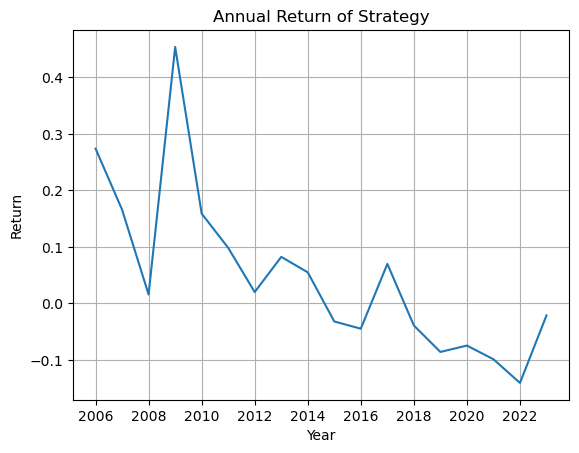

In [72]:
plt.plot(annual_summary['Year'], annual_summary['Annual_return'])
plt.title('Annual Return of Strategy')
plt.ylabel('Return')
plt.xlabel('Year')
plt.grid()

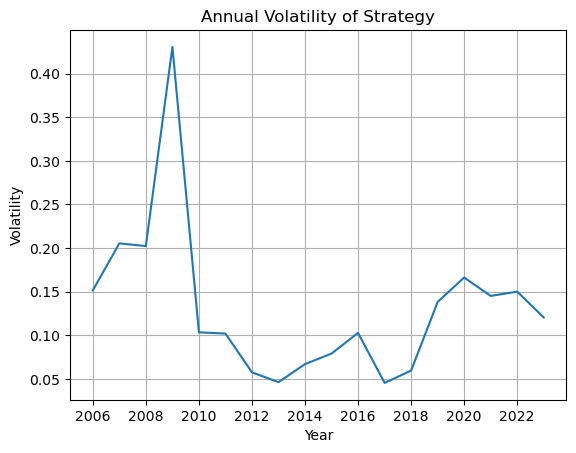

In [73]:
plt.plot(annual_summary['Year'], annual_summary['Annual_volatility'])
plt.title('Annual Volatility of Strategy')
plt.ylabel('Volatility')
plt.xlabel('Year')
plt.grid()